# Exploratory Data Analysis (EDA) on Telecom High-Tech Data
This notebook performs EDA on a dataset for a telecommunications equipment and high-technology services company. We will perform the following steps:
- Treat missing values
- Data transformation
- Visualization before and after transformations
- Calculate statistical measures
- Visualize skewness and kurtosis


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, mode
import missingno as msno


In [ ]:
# Load the dataset
df = pd.read_csv('telecom_high_tech_data.csv')
df.head()


,CustomerID,Age,Gender,Region,SubscriptionType,MonthlyCharge,TenureMonths,DataUsageGB,VoiceMinutes,SMSCount,...,ResolutionTimeDays,DowntimeHours,UptimePercentage,CompetitorOffers,AdCampaigns,SocialMediaMentions,ReferralRate,CustomerLifetimeValue,CustomerAcquisitionCost,R&DSpending
0,1,62,Female,West,Enterprise,286.95,70,241.33,2945,439,...,28,37,90.79,4,17,8747,21.57,29904.81,3880.93,572830.94
1,2,65,Female,North,Enterprise,113.70,87,186.60,7907,620,...,17,50,98.98,3,14,5979,69.76,38527.93,852.50,774339.82
2,3,18,Female,West,Enterprise,67.64,63,72.12,92,223,...,16,48,95.66,8,14,8610,94.68,36337.61,2086.52,60916.80
3,4,21,Male,East,Enterprise,293.46,13,99.41,6683,856,...,16,27,97.39,9,19,1609,72.72,13310.26,1694.69,311981.58
4,5,21,Female,North,Enterprise,243.08,67,39.62,1277,776,...,28,89,98.85,6,3,4926,62.12,12158.43,401.77,844340.50


In [ ]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Region', 'SubscriptionType',
       'MonthlyCharge', 'TenureMonths', 'DataUsageGB', 'VoiceMinutes',
       'SMSCount', 'CustomerSatisfaction', 'SupportTickets', 'DeviceType',
       'ContractType', 'PaymentMethod', 'LastInteraction', 'Churn',
       'ServiceCalls', 'PromotionsOpted', 'Installations', 'Revenue',
       'Expenses', 'Profit', 'MarketShare', 'EmployeeCount',
       'NewSubscriptions', 'Cancellations', 'NetPromoterScore',
       'CustomerLoyaltyIndex', 'TechnicalIssuesReported', 'ResolutionTimeDays',
       'DowntimeHours', 'UptimePercentage', 'CompetitorOffers', 'AdCampaigns',
       'SocialMediaMentions', 'ReferralRate', 'CustomerLifetimeValue',
       'CustomerAcquisitionCost', 'R&DSpending'],
      dtype='object')

In [ ]:
df.shape

(1123, 40)

## Summary Statistics
Let's get an overview of the data with summary statistics.


In [ ]:
# Summary statistics
df.describe(include='all')


,CustomerID,Age,Gender,Region,SubscriptionType,MonthlyCharge,TenureMonths,DataUsageGB,VoiceMinutes,SMSCount,...,ResolutionTimeDays,DowntimeHours,UptimePercentage,CompetitorOffers,AdCampaigns,SocialMediaMentions,ReferralRate,CustomerLifetimeValue,CustomerAcquisitionCost,R&DSpending
count,1123.000000,1123.000000,1123,1123,1123,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,...,1123.000000,1123.000000,1123.000000,1123.00000,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000
unique,NaN,NaN,2,4,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Female,West,Enterprise,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,582,293,393,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,562.000000,43.333927,NaN,NaN,NaN,160.688175,120.324132,241.930534,5111.724844,490.105076,...,14.927872,49.774711,95.049724,4.52894,9.653606,4985.269813,49.759323,25871.073188,2504.708531,488882.217863
std,324.326482,15.144102,NaN,NaN,NaN,82.289734,66.608656,141.758652,2944.353574,282.719127,...,8.134408,29.175509,2.933386,2.81956,5.692214,2830.494489,28.980999,14195.576434,1391.479689,286664.644419
min,1.000000,18.000000,NaN,NaN,NaN,20.260000,1.000000,0.730000,21.000000,0.000000,...,1.000000,0.000000,90.000000,0.00000,0.000000,83.000000,0.070000,510.290000,100.920000,3410.820000
25%,281.500000,30.000000,NaN,NaN,NaN,88.165000,65.000000,120.530000,2625.500000,236.500000,...,8.000000,25.000000,92.475000,2.00000,5.000000,2538.000000,25.145000,13860.875000,1342.635000,238329.175000
50%,562.000000,43.000000,NaN,NaN,NaN,161.060000,121.000000,241.680000,5135.000000,490.000000,...,15.000000,49.000000,95.170000,4.00000,10.000000,4967.000000,48.230000,25946.680000,2421.220000,486878.620000
75%,842.500000,56.000000,NaN,NaN,NaN,234.145000,176.000000,365.240000,7786.000000,728.500000,...,22.000000,76.000000,97.715000,7.00000,14.500000,7309.000000,74.510000,38812.905000,3740.445000,741930.430000


## Missing Values
We will check for missing values and visualize them.


In [ ]:
# Check for missing values
df.isnull().sum()


,0
CustomerID,0
Age,0
Gender,0
Region,0
SubscriptionType,0
MonthlyCharge,0
TenureMonths,0
DataUsageGB,0
VoiceMinutes,0
SMSCount,0


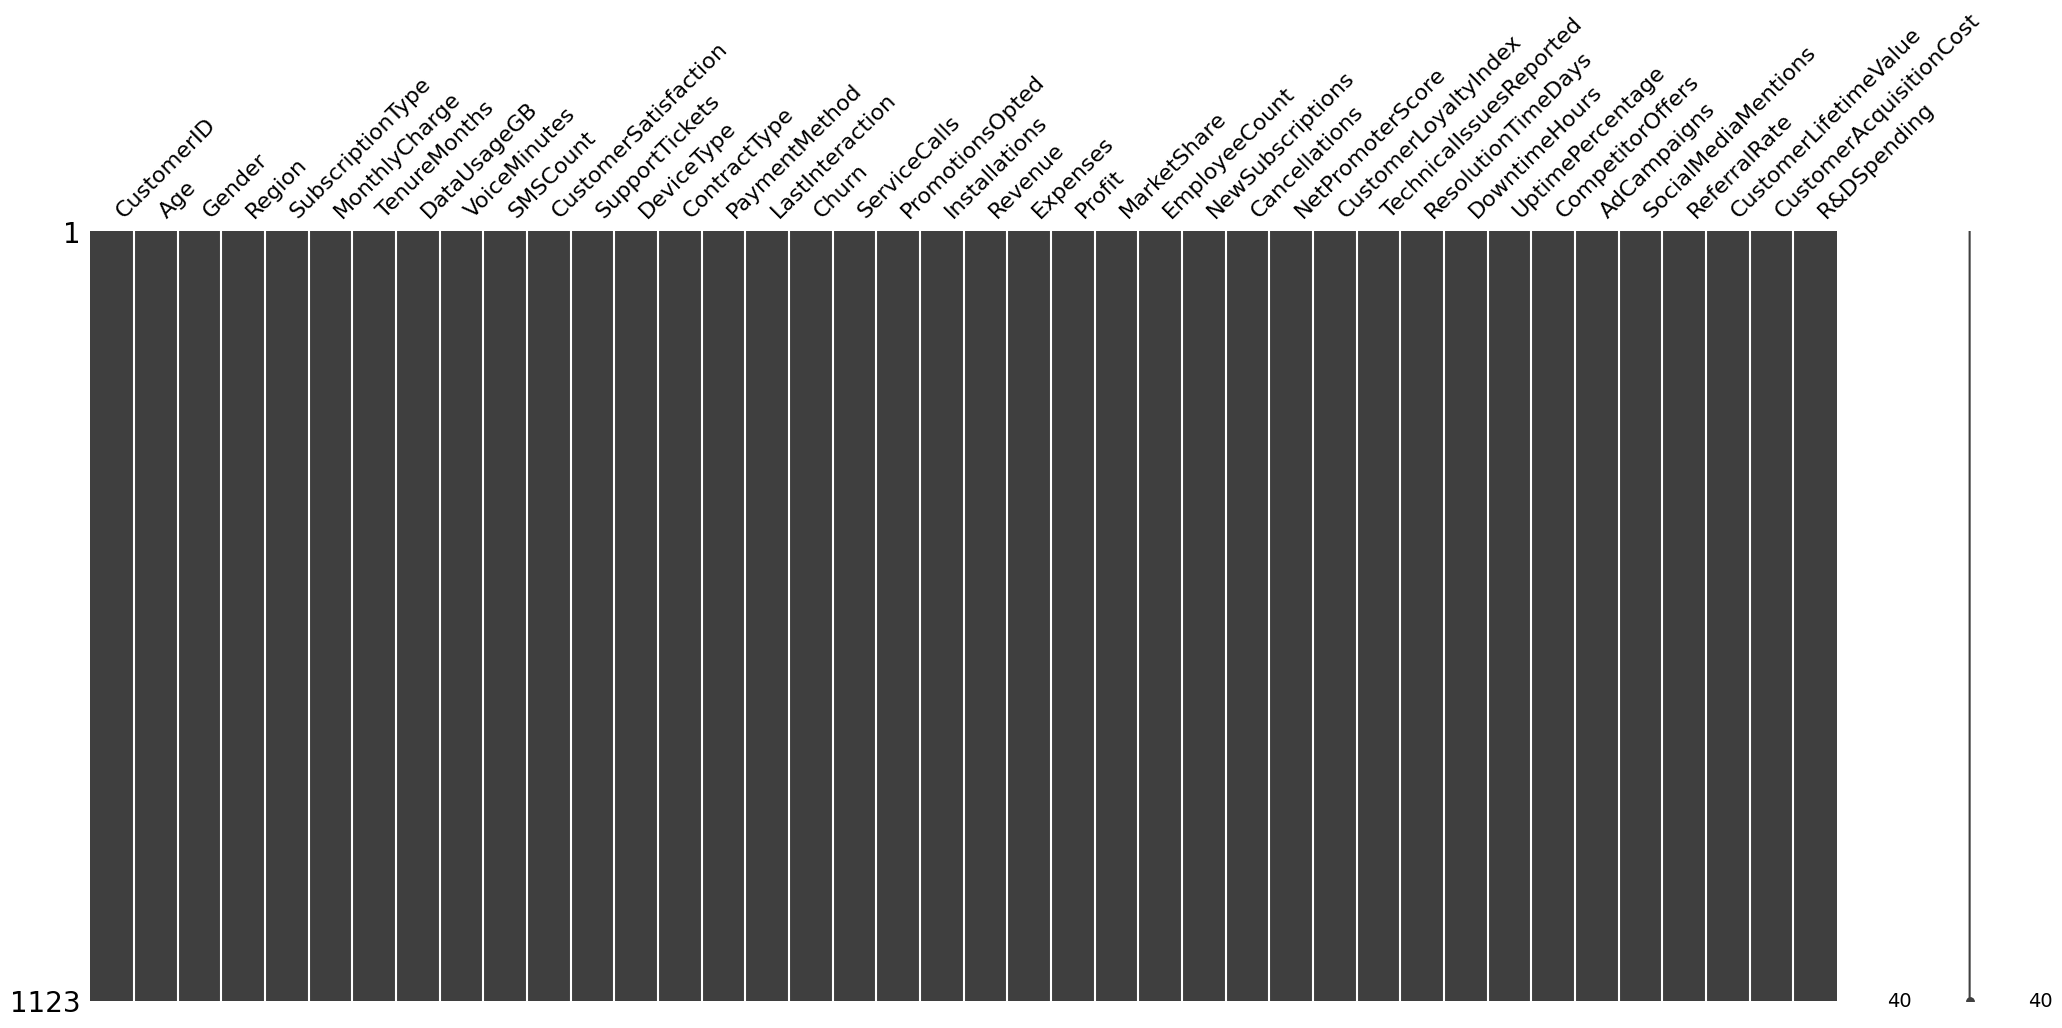

In [ ]:
# Visualize missing values
msno.matrix(df)
plt.show()


### Treat Missing Values
We will fill missing numerical values with the mean and categorical values with the mode.


In [ ]:
# Fill missing values
for column in df.columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        df[column].fillna(df[column].mean(), inplace=True)
# Verify no missing values remain
df.isnull().sum().sum()


<ipython-input-19-4022d00ea74f>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)
<ipython-input-19-4022d00ea74f>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

0

In [ ]:
# prompt: for the below code give me altenative code to fill my missing values other than mean and mode "# Fill missing values
# for column in df.columns:
#     if df[column].dtype == 'object':
#         df[column].fillna(df[column].mode()[0], inplace=True)
#     else:
#         df[column].fillna(df[column].mean(), inplace=True)
# # Verify no missing values remain
# df.isnull().sum().sum()"

# Fill missing values using forward fill
df.fillna(method='ffill', inplace=True)

# Fill any remaining missing values using backward fill
df.fillna(method='bfill', inplace=True)

# Verify no missing values remain
df.isnull().sum().sum()


<ipython-input-20-e6e7236154ea>:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
<ipython-input-20-e6e7236154ea>:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


0

In [ ]:
# prompt: like vlookup in excel give me a code to perform vlookup on "TenureMonths" column on this data

import pandas as pd

# Assuming 'telecom_high_tech_data.csv' is in the current directory or provide the full path
df = pd.read_csv('telecom_high_tech_data.csv')

def vlookup_tenure(df, lookup_value, lookup_column='TenureMonths', return_column='CustomerStatus'):
    """
    Performs a vlookup-like operation on a DataFrame.

    Args:
        df: The input DataFrame.
        lookup_value: The value to search for in the lookup column.
        lookup_column: The column to search in (default: 'TenureMonths').
        return_column: The column whose value to return (default: 'CustomerStatus').

    Returns:
        The value from the return_column corresponding to the lookup_value, or None if not found.
    """
    try:
        # Efficiently find the row where 'TenureMonths' matches the lookup_value
        row = df[df[lookup_column] == lookup_value]
        if not row.empty:
          return row[return_column].iloc[0] #return the first match
        else:
            return None  # Or handle the case where the value is not found
    except KeyError as e:
        print(f"Error: Column '{e}' not found in DataFrame.")
        return None

# Example usage:
lookup_tenure = 20  # Replace with the desired tenure value
result = vlookup_tenure(df, lookup_tenure)
print(f"Customer Status for TenureMonths {lookup_tenure}: {result}")


# Example usage with different return column
result_churn_reason = vlookup_tenure(df, lookup_tenure, return_column = 'ChurnReason')
print(f"Churn Reason for TenureMonths {lookup_tenure}: {result_churn_reason}")

Error: Column ''CustomerStatus'' not found in DataFrame.
Customer Status for TenureMonths 20: None
Error: Column ''ChurnReason'' not found in DataFrame.
Churn Reason for TenureMonths 20: None


## Data Transformation
We will perform data transformations, such as scaling numerical features and encoding categorical variables.


In [ ]:
# Data transformation
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Scale numerical features
scaler = StandardScaler()
numerical_features = df.select_dtypes(include=[np.number]).columns
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Encode categorical features
encoder = LabelEncoder()
categorical_features = df.select_dtypes(include=[object]).columns
for feature in categorical_features:
    df[feature] = encoder.fit_transform(df[feature])

df.head()


,CustomerID,Age,Gender,Region,SubscriptionType,MonthlyCharge,TenureMonths,DataUsageGB,VoiceMinutes,SMSCount,...,ResolutionTimeDays,DowntimeHours,UptimePercentage,CompetitorOffers,AdCampaigns,SocialMediaMentions,ReferralRate,CustomerLifetimeValue,CustomerAcquisitionCost,R&DSpending
0,-1.730509,1.233113,0,3,1,1.535041,-0.755856,-0.004238,-0.736219,-0.180843,...,1.607733,-0.438052,-1.452800,-0.187680,1.291179,1.329593,-0.973116,0.284281,0.989475,0.292977
1,-1.727424,1.431298,0,1,1,-0.571263,-0.500520,-0.390489,0.949791,0.459653,...,0.254850,0.007725,1.340440,-0.542504,0.763908,0.351236,0.690438,0.892003,-1.187904,0.996233
2,-1.724340,-1.673603,0,3,1,-1.131242,-0.860994,-1.198418,-1.705624,-0.945193,...,0.131860,-0.060856,0.208138,1.231613,0.763908,1.281170,1.550695,0.737638,-0.300669,-1.493578
3,-1.721255,-1.475418,1,0,1,1.614187,-1.611982,-1.005822,0.533895,1.294776,...,0.131860,-0.780958,0.798163,1.586436,1.642693,-1.193351,0.792620,-0.885234,-0.582387,-0.617375
4,-1.718170,-1.475418,0,1,1,1.001687,-0.800915,-1.427784,-1.302980,1.011684,...,1.607733,1.345058,1.296103,0.521966,-1.169417,-0.020949,0.426700,-0.966410,-1.511970,1.240532


## Visualization Before and After Transformation
We will visualize distributions of some features before and after transformation.


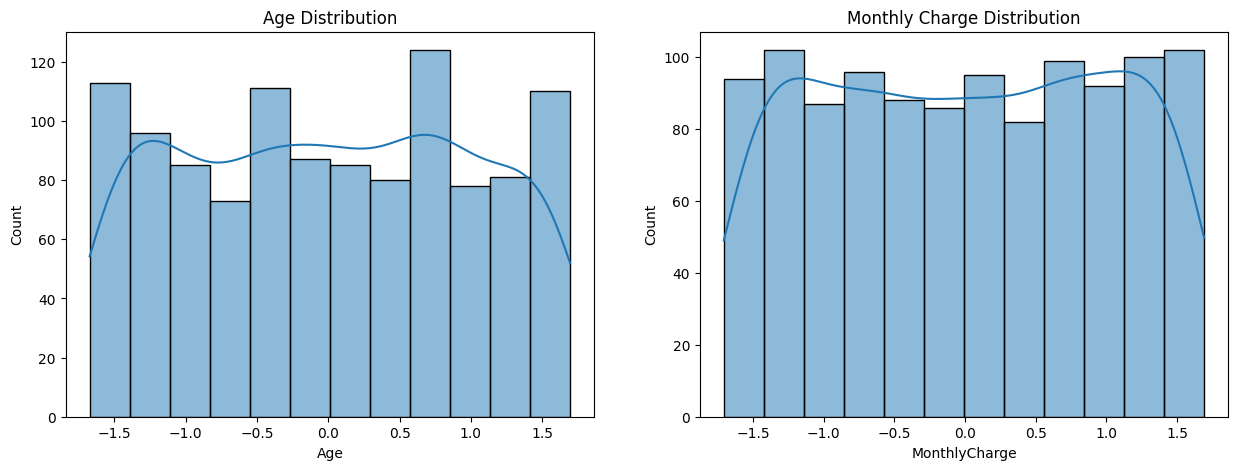

In [ ]:
# Visualization before transformation
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(df['Age'], kde=True, ax=axes[0]).set_title('Age Distribution')
sns.histplot(df['MonthlyCharge'], kde=True, ax=axes[1]).set_title('Monthly Charge Distribution')
plt.show()


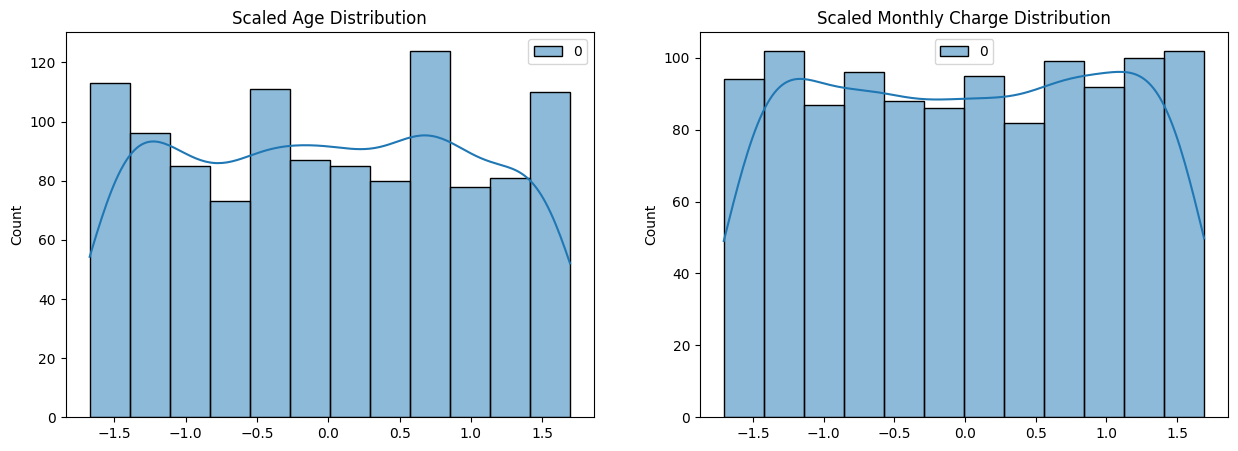

In [ ]:
# Visualization after transformation
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(scaler.fit_transform(df[['Age']]), kde=True, ax=axes[0]).set_title('Scaled Age Distribution')
sns.histplot(scaler.fit_transform(df[['MonthlyCharge']]), kde=True, ax=axes[1]).set_title('Scaled Monthly Charge Distribution')
plt.show()


## Mean
Calculate the mean of each numerical feature.


In [ ]:
# Calculate mean
df.mean()


,0
CustomerID,0.000000e+00
Age,5.694465e-17
Gender,4.817453e-01
Region,1.519145e+00
SubscriptionType,1.008905e+00
MonthlyCharge,-2.238241e-16
TenureMonths,-2.847233e-17
DataUsageGB,1.328709e-16
VoiceMinutes,-1.565978e-16
SMSCount,-2.214514e-17


## Median
Calculate the median of each numerical feature.


In [ ]:
# Calculate median
df.median()


,0
CustomerID,0.000000
Age,-0.022060
Gender,0.000000
Region,2.000000
SubscriptionType,1.000000
MonthlyCharge,0.004521
TenureMonths,0.010151
DataUsageGB,-0.001768
VoiceMinutes,0.007909
SMSCount,-0.000372


## Mode
Calculate the mode of each feature.


In [ ]:
# Calculate mode
df.mode().iloc[0]


,0
CustomerID,-1.730509
Age,-1.475418
Gender,0.000000
Region,3.000000
SubscriptionType,1.000000
MonthlyCharge,-1.619491
TenureMonths,1.046514
DataUsageGB,-1.128974
VoiceMinutes,-1.628833
SMSCount,0.831212


## Measures of Variability
Calculate the measures of variability: variance and standard deviation.


In [ ]:
# Calculate variance
df.var()


,0
CustomerID,1.000891
Age,1.000891
Gender,0.249889
Region,1.280159
SubscriptionType,0.650545
MonthlyCharge,1.000891
TenureMonths,1.000891
DataUsageGB,1.000891
VoiceMinutes,1.000891
SMSCount,1.000891


In [ ]:
# Calculate standard deviation
df.std()


,0
CustomerID,1.000446
Age,1.000446
Gender,0.499889
Region,1.131441
SubscriptionType,0.806563
MonthlyCharge,1.000446
TenureMonths,1.000446
DataUsageGB,1.000446
VoiceMinutes,1.000446
SMSCount,1.000446


## Range
Calculate the range of each numerical feature.


In [ ]:
# Calculate range
df.max() - df.min()


,0
CustomerID,3.461018
Age,3.369148
Gender,1.000000
Region,3.000000
SubscriptionType,2.000000
MonthlyCharge,3.399021
TenureMonths,3.574701
DataUsageGB,3.523400
VoiceMinutes,3.389350
SMSCount,3.520962


## Measures of Dispersion
Calculate measures of dispersion, such as interquartile range (IQR).


In [ ]:
# Calculate interquartile range (IQR)
df.quantile(0.75) - df.quantile(0.25)


,0
CustomerID,1.730509
Age,1.717605
Gender,1.000000
Region,3.000000
SubscriptionType,2.000000
MonthlyCharge,1.774766
TenureMonths,1.667193
DataUsageGB,1.727013
VoiceMinutes,1.753458
SMSCount,1.741018


## Skewness and Kurtosis
Calculate skewness and kurtosis for each numerical feature and visualize them.


In [ ]:
# Calculate skewness
df.skew()


,0
CustomerID,1.013704e-16
Age,3.766359e-03
Gender,7.316518e-02
Region,-3.275081e-02
SubscriptionType,-1.616508e-02
MonthlyCharge,-1.585766e-02
TenureMonths,-6.101961e-03
DataUsageGB,3.465544e-02
VoiceMinutes,-3.480549e-02
SMSCount,7.885936e-04


To interpret the skewness data for these variables, you need to understand what the skewness value represents. Skewness measures the asymmetry of the probability distribution of a real-valued random variable about its mean. Here’s how to infer the data:

1. **CustomerID (1.013704e-16)**: This value is very close to zero, indicating that the distribution of CustomerID is nearly symmetrical.

2. **Age (3.766359e-03)**: This small positive skew indicates that the Age distribution is slightly right-skewed, meaning there are a few older customers pulling the mean to the right.

3. **Gender (7.316518e-02)**: A positive skew indicates that the distribution is slightly right-skewed, potentially indicating a slightly higher number of one gender.

4. **Region (-3.275081e-02)**: A small negative skew means the distribution is slightly left-skewed, with a few regions having higher frequency pulling the mean to the left.

5. **SubscriptionType (-1.616508e-02)**: This small negative skew suggests that the distribution of SubscriptionType is nearly symmetrical but slightly left-skewed.

6. **MonthlyCharge (-1.585766e-02)**: Similarly, this small negative skew indicates the MonthlyCharge distribution is almost symmetrical but slightly left-skewed.

7. **TenureMonths (-6.101961e-03)**: A very small negative skewness indicates a nearly symmetrical distribution of TenureMonths.

8. **DataUsageGB (3.465544e-02)**: This small positive skew suggests a slightly right-skewed distribution for DataUsageGB.

9. **VoiceMinutes (-3.480549e-02)**: A small negative skew indicates the distribution of VoiceMinutes is slightly left-skewed.

10. **SMSCount (7.885936e-04)**: This value is very close to zero, indicating that the distribution of SMSCount is nearly symmetrical.

11. **CustomerSatisfaction (-6.937718e-02)**: A slightly negative skew suggests the distribution of CustomerSatisfaction is left-skewed.

12. **SupportTickets (2.974306e-02)**: This small positive skew indicates a slightly right-skewed distribution for SupportTickets.

13. **DeviceType (-2.865532e-02)**: A small negative skew indicates the distribution of DeviceType is slightly left-skewed.

14. **ContractType (-7.905526e-02)**: This small negative skew suggests a slightly left-skewed distribution for ContractType.

15. **PaymentMethod (8.596806e-03)**: A value close to zero indicates a nearly symmetrical distribution for PaymentMethod.

16. **LastInteraction (0.000000e+00)**: This value is exactly zero, indicating perfect symmetry in the distribution of LastInteraction.

17. **Churn (1.424767e+00)**: This larger positive skew suggests a right-skewed distribution for Churn, indicating more customers are likely not churning but a significant number of high churn rates exist.

18. **ServiceCalls (-4.042155e-02)**: A small negative skew indicates a slightly left-skewed distribution for ServiceCalls.

19. **PromotionsOpted (7.527509e-02)**: A slightly positive skew suggests a right-skewed distribution for PromotionsOpted.

20. **Installations (-5.111397e-02)**: A small negative skew indicates a slightly left-skewed distribution for Installations.

21. **Revenue (7.533291e-02)**: A slightly positive skew suggests a right-skewed distribution for Revenue.

22. **Expenses (8.247765e-02)**: This positive skew indicates a right-skewed distribution for Expenses.

23. **Profit (2.094494e-02)**: A small positive skew suggests a slightly right-skewed distribution for Profit.

24. **MarketShare (-5.933731e-03)**: A very small negative skew indicates a nearly symmetrical distribution for MarketShare.

25. **EmployeeCount (4.409452e-02)**: A slightly positive skew suggests a right-skewed distribution for EmployeeCount.

26. **NewSubscriptions (-3.745080e-02)**: A small negative skew indicates a slightly left-skewed distribution for NewSubscriptions.

27. **Cancellations (-5.319479e-02)**: A small negative skew suggests a slightly left-skewed distribution for Cancellations.

28. **NetPromoterScore (-2.737369e-02)**: A small negative skew indicates a slightly left-skewed distribution for NetPromoterScore.

29. **CustomerLoyaltyIndex (-5.523066e-02)**: A small negative skew suggests a slightly left-skewed distribution for CustomerLoyaltyIndex.

30. **TechnicalIssuesReported (-8.478600e-03)**: A very small negative skew indicates a nearly symmetrical distribution for TechnicalIssuesReported.

31. **ResolutionTimeDays (2.150859e-02)**: A small positive skew suggests a slightly right-skewed distribution for ResolutionTimeDays.

32. **DowntimeHours (9.001549e-03)**: A value close to zero indicates a nearly symmetrical distribution for DowntimeHours.

33. **UptimePercentage (-5.085514e-02)**: A small negative skew suggests a slightly left-skewed distribution for UptimePercentage.

34. **CompetitorOffers (1.022534e-03)**: A value close to zero indicates a nearly symmetrical distribution for CompetitorOffers.

35. **AdCampaigns (3.845307e-03)**: This small positive skew suggests a slightly right-skewed distribution for AdCampaigns.

36. **SocialMediaMentions (-6.984067e-03)**: A very small negative skew indicates a nearly symmetrical distribution for SocialMediaMentions.

37. **ReferralRate (4.783595e-02)**: A slightly positive skew suggests a right-skewed distribution for ReferralRate.

38. **CustomerLifetimeValue (-3.887352e-02)**: A small negative skew indicates a slightly left-skewed distribution for CustomerLifetimeValue.

39. **CustomerAcquisitionCost (7.289680e-02)**: This slightly positive skew suggests a right-skewed distribution for CustomerAcquisitionCost.

40. **R&DSpending (3.196321e-02)**: A small positive skew indicates a slightly right-skewed distribution for R&DSpending.

In summary, the data shows a mix of positive and negative skewness values, with most of them being very close to zero, indicating nearly symmetrical distributions. A few variables, like Churn, have larger skewness values, indicating a more pronounced asymmetry in their distribution.

In [ ]:
# Calculate kurtosis
df.kurt()


,0
CustomerID,-1.200000
Age,-1.203567
Gender,-1.998209
Region,-1.389010
SubscriptionType,-1.462452
MonthlyCharge,-1.246054
TenureMonths,-1.131246
DataUsageGB,-1.159796
VoiceMinutes,-1.225188
SMSCount,-1.176700


Kurtosis is a statistical measure that describes the shape of a distribution's tails in relation to its overall shape. Specifically, it indicates whether the data are heavy-tailed or light-tailed relative to a normal distribution. A normal distribution has a kurtosis of 0 (after adjusting for the Fisher definition).

Here's how to interpret the provided kurtosis values for each variable in your dataset:

1. **Negative Kurtosis**: All the variables except `LastInteraction` and `Churn` have negative kurtosis values. Negative kurtosis (platykurtic) indicates that the data distribution is flatter than a normal distribution, implying fewer extreme outliers.

2. **Zero Kurtosis (`LastInteraction`)**: This value suggests that the distribution of `LastInteraction` is similar to a normal distribution, at least in terms of its tails.

3. **Slight Positive Kurtosis (`Churn`)**: This value is close to zero, indicating that the distribution of `Churn` is also close to normal, with slightly heavier tails.

Let's summarize the interpretation for each variable:

1. **CustomerID**: The distribution is flatter than a normal distribution, suggesting fewer extreme values.
2. **Age**: Similar to CustomerID, indicating fewer extreme age values.
3. **Gender**: Flatter distribution, fewer extreme values.
4. **Region**: Flatter distribution, fewer extreme values.
5. **SubscriptionType**: Flatter distribution, fewer extreme values.
6. **MonthlyCharge**: Flatter distribution, fewer extreme values.
7. **TenureMonths**: Flatter distribution, fewer extreme values.
8. **DataUsageGB**: Flatter distribution, fewer extreme values.
9. **VoiceMinutes**: Flatter distribution, fewer extreme values.
10. **SMSCount**: Flatter distribution, fewer extreme values.
11. **CustomerSatisfaction**: Flatter distribution, fewer extreme values.
12. **SupportTickets**: Flatter distribution, fewer extreme values.
13. **DeviceType**: Flatter distribution, fewer extreme values.
14. **ContractType**: Flatter distribution, fewer extreme values.
15. **PaymentMethod**: Flatter distribution, fewer extreme values.
16. **LastInteraction**: Distribution is similar to normal.
17. **Churn**: Slightly heavier tails compared to normal.
18. **ServiceCalls**: Flatter distribution, fewer extreme values.
19. **PromotionsOpted**: Flatter distribution, fewer extreme values.
20. **Installations**: Flatter distribution, fewer extreme values.
21. **Revenue**: Flatter distribution, fewer extreme values.
22. **Expenses**: Flatter distribution, fewer extreme values.
23. **Profit**: Flatter distribution, fewer extreme values.
24. **MarketShare**: Flatter distribution, fewer extreme values.
25. **EmployeeCount**: Flatter distribution, fewer extreme values.
26. **NewSubscriptions**: Flatter distribution, fewer extreme values.
27. **Cancellations**: Flatter distribution, fewer extreme values.
28. **NetPromoterScore**: Flatter distribution, fewer extreme values.
29. **CustomerLoyaltyIndex**: Flatter distribution, fewer extreme values.
30. **TechnicalIssuesReported**: Flatter distribution, fewer extreme values.
31. **ResolutionTimeDays**: Flatter distribution, fewer extreme values.
32. **DowntimeHours**: Flatter distribution, fewer extreme values.
33. **UptimePercentage**: Flatter distribution, fewer extreme values.
34. **CompetitorOffers**: Flatter distribution, fewer extreme values.
35. **AdCampaigns**: Flatter distribution, fewer extreme values.
36. **SocialMediaMentions**: Flatter distribution, fewer extreme values.
37. **ReferralRate**: Flatter distribution, fewer extreme values.
38. **CustomerLifetimeValue**: Flatter distribution, fewer extreme values.
39. **CustomerAcquisitionCost**: Flatter distribution, fewer extreme values.
40. **R&DSpending**: Flatter distribution, fewer extreme values.

In summary, the data indicates that most variables have distributions with lighter tails than a normal distribution, implying that extreme values are less frequent.

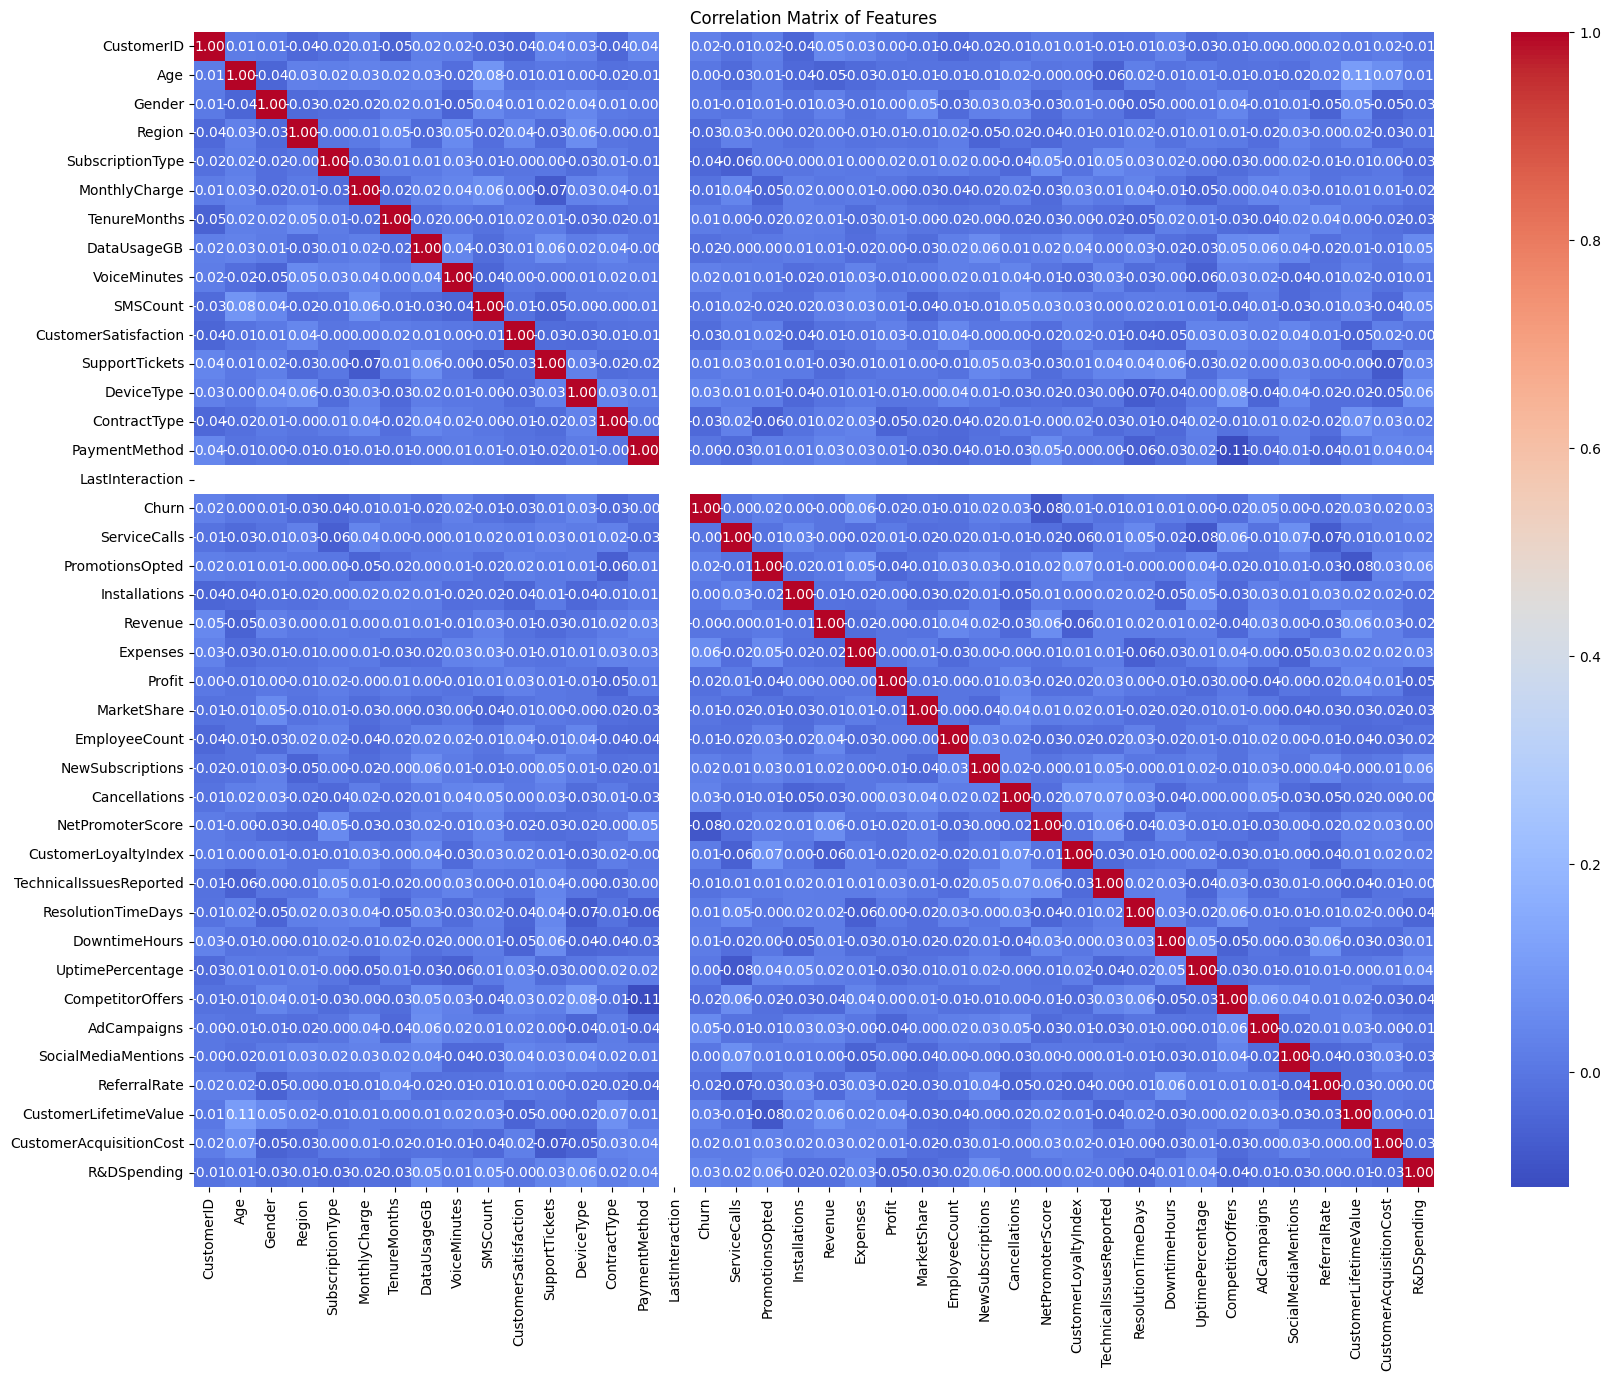

Correlation with Churn:
 Churn                      1.000000
Expenses                   0.061168
AdCampaigns                0.054068
DeviceType                 0.034615
R&DSpending                0.033187
CustomerLifetimeValue      0.031734
Cancellations              0.030689
VoiceMinutes               0.024590
CustomerID                 0.024582
NewSubscriptions           0.022964
PromotionsOpted            0.020938
CustomerAcquisitionCost    0.015105
DowntimeHours              0.012979
TenureMonths               0.012590
CustomerLoyaltyIndex       0.012339
ResolutionTimeDays         0.010490
SupportTickets             0.007552
Gender                     0.005722
UptimePercentage           0.004685
Installations              0.004220
SocialMediaMentions        0.001603
Age                        0.000605
Revenue                   -0.003503
PaymentMethod             -0.004378
ServiceCalls              -0.004643
MarketShare               -0.006248
SMSCount                  -0.009960
Tec

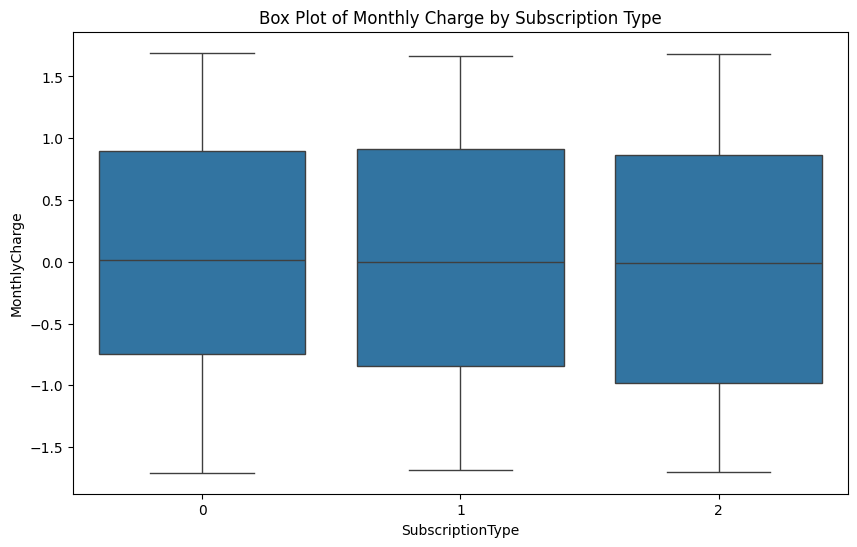


Quantiles of MonthlyCharge: 0.25   -0.881708
0.50    0.004521
0.75    0.893059
Name: MonthlyCharge, dtype: float64


In [ ]:
# prompt: suggest me what other statics calculations i can do on this data

# Correlation Analysis
correlation_matrix = df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

# Correlation with target variable (e.g., 'Churn')
correlation_with_churn = df.corr()['Churn'].sort_values(ascending=False)
print("Correlation with Churn:\n", correlation_with_churn)

# Group-by and Aggregation
# Example: Average monthly charge by subscription type
average_monthly_charge_by_subscription = df.groupby('SubscriptionType')['MonthlyCharge'].mean()
print("\nAverage Monthly Charge by Subscription Type:\n", average_monthly_charge_by_subscription)

# More complex aggregations
agg_data = df.groupby('SubscriptionType').agg({'MonthlyCharge': ['mean', 'median', 'std'],
                                               'TenureMonths': ['min', 'max', 'mean']})
print("\nAggregated Data:\n", agg_data)


# Statistical Tests
# Example using t-test to compare means of two groups
from scipy.stats import ttest_ind

group1 = df[df['SubscriptionType'] == 0]['MonthlyCharge']  # Replace 0 and 1 with actual group values
group2 = df[df['SubscriptionType'] == 1]['MonthlyCharge']
t_statistic, p_value = ttest_ind(group1, group2)
print(f"\nT-test results: t-statistic = {t_statistic:.2f}, p-value = {p_value:.3f}")

#ANOVA test
from scipy.stats import f_oneway
groups = [df[df['SubscriptionType'] == i]['MonthlyCharge'] for i in df['SubscriptionType'].unique()]
f_statistic, p_value_anova = f_oneway(*groups)
print(f"\nAnova test results: f-statistic = {f_statistic:.2f}, p-value = {p_value_anova:.3f}")


#Outlier detection using box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='SubscriptionType', y='MonthlyCharge', data=df)
plt.title('Box Plot of Monthly Charge by Subscription Type')
plt.show()


# Quantile Analysis
quantiles = df['MonthlyCharge'].quantile([0.25, 0.5, 0.75])
print("\nQuantiles of MonthlyCharge:", quantiles)

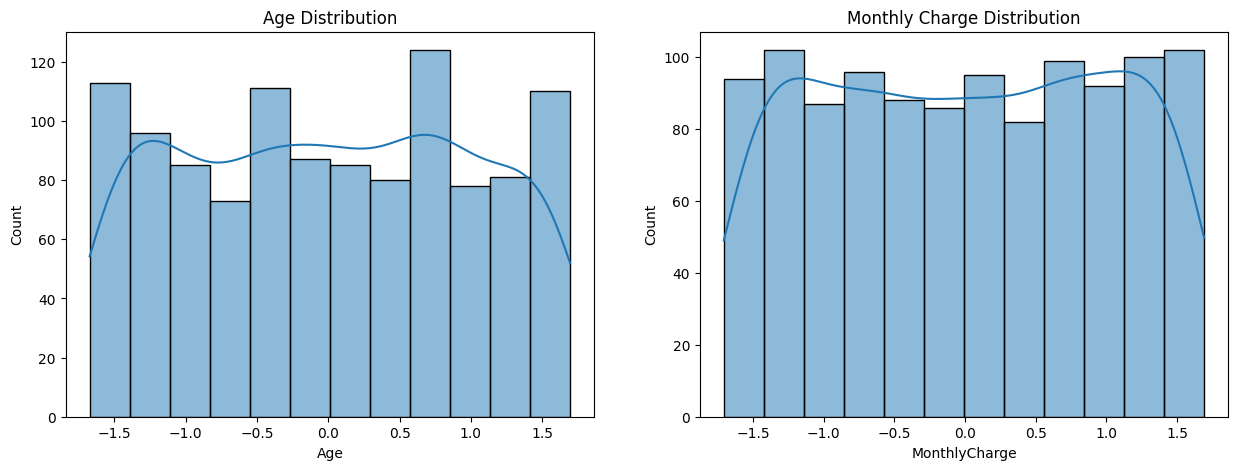

In [ ]:
# Visualization of skewness and kurtosis
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(df['Age'], kde=True, ax=axes[0]).set_title('Age Distribution')
sns.histplot(df['MonthlyCharge'], kde=True, ax=axes[1]).set_title('Monthly Charge Distribution')
plt.show()
